# Chapter 19 - Classification Models and Evaluation

In the last chapter, we introduced the approach to directly minimize a loss function in a continuous model. 
In this chapter we will apply this method to classification with some adaptations and also alternative approaches. 

## Classification and Probabilities

The main difference between classification and regression is that in regression the target values are continuous, while in classification the values are categorical. 
The metric we have used in chapters 16 and 17 for classification was accuracy, i.e. the proportion of correctly classified items in a dataset. 
However, accuracy is a discrete function (based on binary input of classification success). 
Optimization methods using gradients (like linear regression or gradient descent) need continuous functions and cannot directly be applied.  
A way to avoid this problem and also gain a richer representation of the classifiers output is to predict probabilities. 
we have actually done this already in the logistic regression example. 

Using regression analysis helps 

We will leave the details of the optimization aside mostly, there are many excellent textbooks that address the mathematical and computational details, e.g. <mark>add list of references here</mark>. Instead we will focus on how to use these models.  

### Logistic Regression and Cross-Entropy

Binary logistic regression was defined in chapter 13 through this link function:
$$ \pi(x) = \sigma(a) = \frac{e^{a}}{1+e^{a}} = \frac{1}{1+e^{-x}}, $$
where $\pi$ is the **probability of success** (i.e. class 1) and $\sigma$ is called the **logistic function**, and $a = \mathbf{w}^\top \mathbf{x}$. 
The logistic function is useful for probabilities, as it has a range of $]0,1[$. As discussed in chapter 13, $a$ represents the **log-odds**. They are often called **logits** in machine learning. 

For a maximum likelihood estimate of the model, we view the class labels $y_k$ as 1 and 0 probabilities of success, as we assume them to be correct. The likelihood of our data $\pi(\mathbf{X})$ is then 
$$\mathcal{L} = \prod_k \pi(\mathbf{x_k}) y_k + (1-\pi(\mathbf{x_k}) (1-y_k).$$ 
In this expression, one summation element is always zero; which one depends on whether the true class $y_k$ is 1 or 0. 
The negative log likelihood is then $$ NLL = - \sum \log(\pi(\mathbf{x_k})) y_k + \log(1-\pi(\mathbf{x_k}) (1-y_k),$$.  
The elements of the summation are called the **cross-entropy** of the prediction $\pi(x)$ with respect to the true value $y_k$, also written as $H(y,\pi(\mathbf{x_k})) = \log(\pi(\mathbf{x_k})) y_k + \log(1-\pi(\mathbf{x_k}) (1-y_k)$.

Therefore, miniziming the cross-entropy maximises the probability of our predictions. Since the all the involved functions are differentiable, we can directly optimise the parameters. In general, there are no closed form solutions for this problem, but many different algorithms that use different gradient-based methods, including stochastic gradient descent that we used in the previous chapter. For a more detailed discussion, see <mark>add Murphy and Hastie references</mark>. 


### From Logistic Regression to Neural Networks

We can extend the logistic regression model by replacing $a = \mathbf{w}^\top \mathbf{x} = \sum_d w_d x_d $ 
with $ a = \sigma( \sum_k w2_k b_k $ ), where with $ b_k = \f( \sum_d w1_{kd} x_d )$, similar to the regression MLP in the last chapter.  
This is again a neural network with one input layer (the $x_d$), one hidden layer (the $b_k$) and one output neuron. 
The activation function $f$ can be a sigmoid function, which would make all neurons use the same activation function, but that is not required, other non-linear continuous functions are also possible and are used in practice. 
The only general difference of a classification MLP, compared to the regression MLP used in the last chapter, is that the final output is processed by a sigmoid function and that we are using cross-entropy as our loss function.


### Alternative Approaches 

Althoug numeric optimization of parameters in a continuous model is the most popular approach in machine learning, there are alternatives. 

#### Generative Models - Naive Bayes 

Naive Bayes classification is a popular classifier, because the idea behind it is straightforward and it is computationally efficient. 
The general idea is to take the distribution of the features given the classes in the training data to infer the  probability of the classes given the features. 
This is achieved using Bayes' theorem, which is in general stated as 
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}.$$
In our case, $A$ is class value and $B$ the feature vector.  

$P(A)$ be obtained by counting the class labels and estimating the distribution. 
The values of $P(B)$ are typically more difficult to estimate, as there are usually many more possible feature value combinations than data points. 
Fortunately, the value of $P(B)$ is not required since it is independent of the class A. 
Therefore we can just calculate the numberators and then normalize so that they add up to 1, as is required for a probability distribution.
The value of $P(B|A)$ is the most difficult part, as  
even in the simplest case of discrete features, there are typcially many more possible values of $A$ and $B$ than we have data points. 
We can work around that problem by making the assmption that gave the method ist name: we assume that the elements $B_d$ of $\mathbf{B}$ are independently distributed, so that $P(B|A) = \prod_d P(B_d|A)$. 
This makes the estimation pracitcal as there are typically enough datapoints to estimate of $P(B_d|A)$, i.e. the distribution of each feature dimension individually per class. 
This independence assumption is called *naive*, because it is typically not true or uncertain. 
In practice it has bowever been observed that naive Bayes classification produced good results even if there are dependencies in the distribution of the $B__d$. 




In [ ]:
from sklearn.

### Synthetic Data Example 1

We will small artifical dataset examples to illustrate how differences in the data affect different models. 
Scikit-learn provides functions to generate datasets according to specific distributions. 
The first example is has 2-dimensional input vectors and 2 classes. 
The class distribution is according to a gaussian distribution around zero. 
This type of data exposes a limit of linear models (including logistic regression). 
We can undestand this by considering the decision boundary, i.e. where the probability is $\sigma(a)$ is 0.5, i.e. $a = 0$.
For a linear model this is a straight line at $ 0 = \mathbf{w}^\top \mathbf{x} = w_1 x_1 + w_2 x_2 + w_3 $, where $w_3$ is a intercept (bias). 
The Gaussian distribution means that the class boundary of the generating process is on a circle. 
Since there is no straight line that separates the inside from the outside of a circle, there is not linear model that adequately represents the generating process. 

The following code generates the dataset and plots the data points with the class labels indicated by colours. 
Then a logistic regression model is trained and used to make predictions on the training set, which are again plotted. 

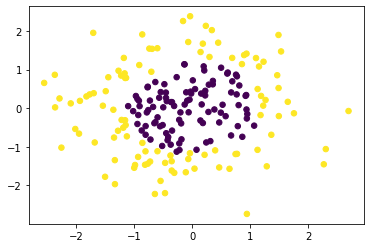

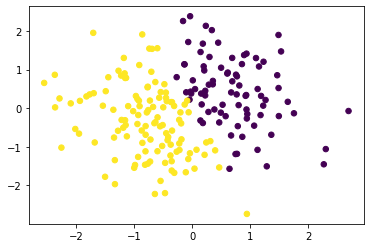

LGR accuracy - train:  0.55 , test 0.54


In [312]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X1, y1 = make_gaussian_quantiles(n_features=2, n_classes=2,n_samples=400,random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,train_size=0.5,random_state=0)

plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train, s=30)
plt.show()

lgr = LogisticRegression()
lgr.fit(X1_train,y1_train)
y1_train_hat = lgr.predict(X1_train)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train_hat, s=30)
plt.show()
print("LGR accuracy - train: ",lgr.score(X1_train,y1_train),", test", lgr.score(X1_test,y1_test))

# seed = 0 # this is used with the train_test_split to avoid random behaviour for this demo
# X = dataset.data
# y = dataset.target

We can see clearly that the decision boundary of the logistic regression model is very different from the true classes. 
This leads to low accuracy on the training data and on unseen test data, commonly described as **underfitting**. 

Next we use an MLP classifier, which has a nonlinear hidden layer so that it can approcimate any function within the output range, as mentioned in the last chapter. 
For neural networks, training can often take many iterations to converge, i.e. reach a stable state. 
The default maximum of 200 iterations is often not sufficient, so that we set it here to 2000. 

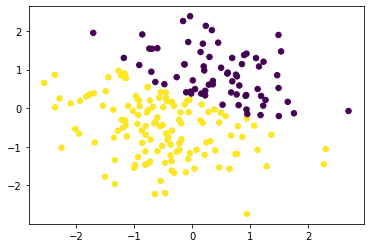

MLPC train:  0.49 , test 0.495


In [313]:
from sklearn.neural_network import MLPClassifier 

mlpc = MLPClassifier(activation='logistic',max_iter=2000,random_state=1)
mlpc.fit(X1_train,y1_train)
y1_train_hat = mlpc.predict(X1_train)
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker="o", c=y1_train_hat, s=30)
plt.show()
mlpc.score(X1_train,y1_train)
print("MLPC train: ",mlpc.score(X1_train,y1_train),", test", mlpc.score(X1_test,y1_test))


# seed = 0 # this is used with the train_test_split to avoid random behaviour for this demo
# X = dataset.data
# y = dataset.target

The results are visually very similar to the true labels and the accuracy on both training and test data is high. 
We can conclude that MLP is a good choice. 
When running to code, you may notice that fitting the model takes a bit longer. 
This can be reduced somewhat by reducing the size of the model, but it may be necessary to invest more computation for using a more complex model. 

### Synthetic Data Example 2

As a contrast, we will now create a dataset that is generated by a process that fits a linear model. 
We make this dataset relatively small and add some so-called label noise by changing the class label on 30% of the data using the `flip_y` parameter. 
The dataset is generated as two clusters of points, each for one class. 
A line between the  cluster centers is the ideal classification boundary, so that a linear model seems like a good choice. 

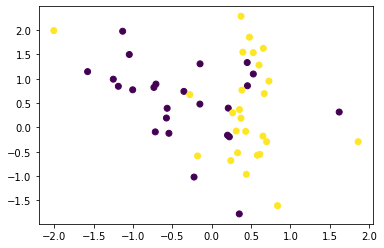

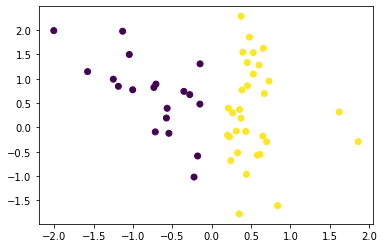

LGR train:  0.78 , test 0.7


In [314]:
from sklearn.datasets import make_classification

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, class_sep=.5, flip_y=0.3,
                                         n_clusters_per_class=1,n_samples=100,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size=0.5,random_state=0)



plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train)
plt.show()

#lgr = LogisticRegression(penalty='none')
lgr = LogisticRegression()
lgr.fit(X2_train,y2_train)
y2_train_hat = lgr.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("LGR train: ",lgr.score(X2_train,y2_train),", test", lgr.score(X2_test,y2_test))


The rsults show that the trained logistic regression model indeed separates the classes along a line that (according to visual inspection) lies between the clusters. 
The accuracy values are lower than in the last example. 
However, taking into account that 30% of the labels have been flipped, accuracy of .7 this is as good as we can expect the result to be.

For comparison we will now try a MLP classifier without regularization. 
This much more flexible model should be able to adapt well to the training data. 
The question is, what will happen with unseen data.

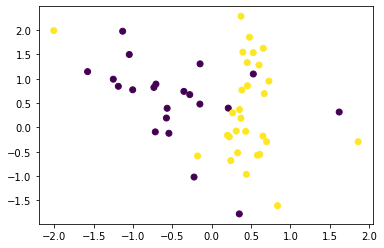

MLPC train:  0.9 , test 0.64


In [315]:
mlpc = MLPClassifier(alpha=0,max_iter=2000)
mlpc.fit(X2_train,y2_train)
y2_train_hat = mlpc.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("MLPC train: ",mlpc.score(X2_train,y2_train),", test", mlpc.score(X2_test,y2_test))

The results show that the model adapts very well to the training data, given that the class areas are overlapping. 
A good example is the single point on the far right with the purple lable. 
Given that the underlying process is based on one cluster per class, this point has has its label flipped with high probability. 
Therefore, the model is adapting to the label noise, which is unpredictable and should be ignored by the model. 
The is reflected in the lower accuracy on the test set.

One way to address this is by using regularization. 
The alpha parameter sets the weight of the $L_2$ regularization, which is by default set to $0.001$. With a value of $0.1$, we can expect a noticable effect. 

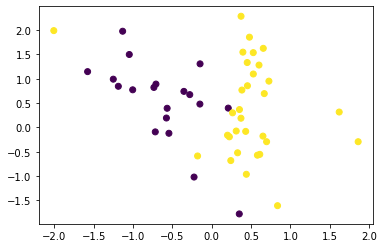

MLPC train:  0.86 , test 0.68


In [316]:
mlpc = MLPClassifier(alpha=.1,max_iter=2000,random_state=4)
mlpc.fit(X2_train,y2_train)
y2_train_hat = mlpc.predict(X2_train)
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker="o", c=y2_train_hat)
plt.show()
print("MLPC train: ",mlpc.score(X2_train,y2_train),", test", mlpc.score(X2_test,y2_test))

The test accuracy is improved as expected, but still much lower than the training accuracy. Using a more complex model and performing some hyper-parameter tuning, we still have a slightly lower generalization.

### Inductive Bias and the No Free Lunch Theorem

This little experiment illustrated that the effectiveness of machine learning models depends on the nature of the data. 
If we have no prior knowledge about the data, it can indeed be shown that there is no learning algorithm that is generally better than others, which is stated in the so-called **No Free Lunch Theorem** (D. Wolpert. *The lack of a priori distinc- tions between learning algorithms*. Neural Computation 8.7 (1996), pp. 1341–1390). 

Different algorithms have different propensities and limitation in how they adapt to the data, this is called their **inductive bias**. 
If we don't know the structure of the data, we have to use experimentaton to find the most suitable models. 
However, an exhaustive search of learning models and/or feature extractions is intractable even for datasets of moderate size. 
Therefore, prior knowledge or hypotheses about the structure of the data and a good understanding of the nature of the models can be invaluable in choosing good models and hyperparameters saving effort and computation time, and leading to more robust models. 

### Big Data and Deep Learning

Notwithstanding the value of prior knowledge, the most influential trend in machine learning has been the use of end-to-end learning with deep neural networks on vast amounts of data. 
Given the 


In [168]:

from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.4,random_state=seed)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=.5,random_state=seed)
print(len(y_train),len(y_val),len(y_test))

# most classifiers work better with scaled input data
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train_scl = sclr.fit_transform(X_train) # scale all 3 sets:
X_val_scl = sclr.fit_transform(X_val)
X_test_scl = sclr.fit_transform(X_test)
[np.mean(y_val),np.std(y_val)]

NameError: name 'seed' is not defined

### Logistic regression

We now use another classifier: the K-Nearest--Neighbor (KNN) classifier. This classifier is very simple: is views the feature values of an item as a vectors. For a new feature vector, we calculate the $k$ closest feature vectors in our training set. We then look up the classes belonging to these $k$ feature vectors and choose the most frequent one as our KNN prediction. The number $k$ determines the behaviour. In the simplest case we can choose $1$, which makes it easy to select the predicted class (no ties).  

This is a very simple classifier, but it can be quite effective. In order to select whether to use KNN or Decision Trees, we train both types of model on our training set and calculate the performance on the validation set. We also calculate the performance on the test set, which is a more realistic estimate of the performance on unseen data. 

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# train both linar model 
lr = LinearRegression()
lr.fit(X_train_scl,y_train)

# helper functions to calculate the accuracy values on train, validation and test set. 
def rmse(X,y,predictor):
    return np.mean(np.square(predictor.predict(X)-y))

def trainValTestMse(predictor):
    vals = {}
    vals['train'] = rmse(X_train_scl,y_train,predictor)
    vals['val'] = rmse(X_val_scl,y_val,predictor)
    vals['test'] = rmse(X_test_scl,y_test,predictor)
    return vals

print("Linear regression: ",trainValTestMse(lr))

Linear regression:  {'train': 51.78004290628544, 'val': 55.175429959614796, 'test': 59.00716319829052}


### Random Forest

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# train both model 
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train_scl,y_train)

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train_scl,y_train)

print("DT regression: ",trainValTestMse(dtr))
print("RF regression: ",trainValTestMse(rfr))

DT regression:  {'train': 53.01262533452922, 'val': 61.210493352374485, 'test': 60.993757651463355}
RF regression:  {'train': 21.49695663190402, 'val': 57.89668097306295, 'test': 58.9224391076755}


### Summary

Machine Learning approaches the problems of learning form data in a direct way, often relaxing the traetment of probabilities and distributions. 
The general setting is to learn a model that estimates, in ML terminology: predicts, an unknown dependent value, in ML terminology: the label. 

The most common form of machine learning is supervised learning, where we have labelled data that we use to fit (train) the model. 
In order to evaluate the quality of our model, we need to use a 

### Exercises


